### Discovering Metrics
Trying out some metrics with a example of Linear Regression with diamond dataset

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
sns.set()

In [76]:
# Load the data
df = sns.load_dataset("diamonds")

In [77]:
# EDA
# sns.pairplot(df, plot_kws = {'alpha': 0.05})
# plt.show()
# display(df.describe())

In [78]:
# Preprocessing
df = df[(df[['x','y','z']] != 0).all(axis=1)] # drop outliers
X = df[['carat']]
y = df[['price']]

# hold out
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [79]:
# train & predict
model = LinearRegression()
model.fit(train_X, train_y)
pred = model.predict(test_X)

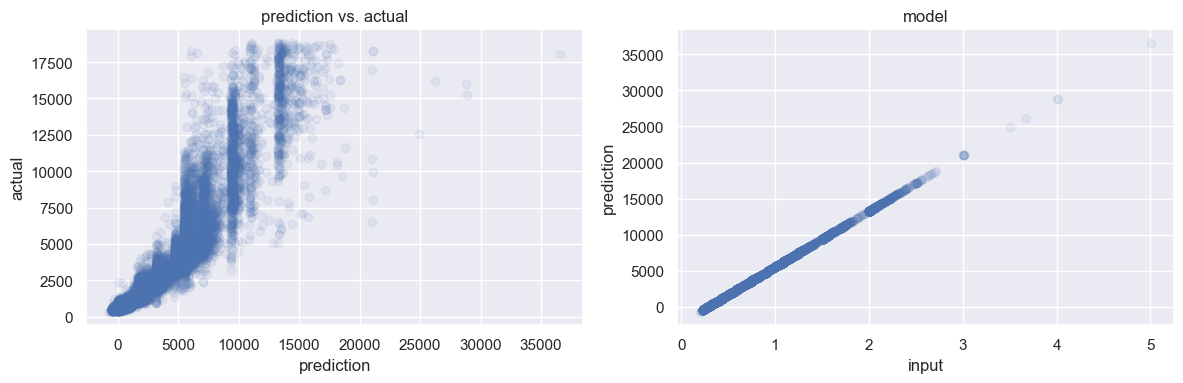

In [80]:
# show the result
f, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].scatter(pred, test_y, alpha = 0.08)
ax[0].set(title = 'prediction vs. actual', xlabel = 'prediction', ylabel = 'actual')
ax[1].scatter(test_X, pred, alpha = 0.08)
ax[1].set(title = 'model', xlabel = 'input', ylabel = 'prediction')
f.tight_layout()
plt.show()

In [81]:
def adjusted_r2_score(test_data, predicted_data):
    n = test_data.shape[0]
    p = test_data.shape[1]
    r2 = r2_score(test_data, predicted_data)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

print(
    f"MSE: {mean_squared_error(test_y,  pred)}\n"
    f"RMSE: {mean_squared_error(test_y, pred, squared = False)}\n"
    f"MAE: {mean_absolute_error(test_y, pred)}\n"
    f"R2_score: {r2_score(test_y, pred)}\n"
    f"adjusted R2 score: {adjusted_r2_score(test_y, pred)}"
)

MSE: 2517803.0481689107
RMSE: 1586.7586609717657
MAE: 1024.2708013722195
R2_score: 0.8429944099349902
adjusted R2 score: 0.8429827609076816


**Metrics frequently used for regression problems**

- MSE: the average of the squares of the errors
- RMSE: square root of MSE
- MAE: the average of the absolute value of the errors
- R2: the percentage of the response variable variation that is explained by a linear model

#### try other model and compare by the metrics

In [82]:
df = sns.load_dataset("diamonds")

In [83]:
df = df[(df[['x', 'y', 'z']] != 0).all(axis = 1)]
X = df[['carat']]
y = df[['price']]

train_X, test_X, train_y, test_y = train_test_split(X, y)

In [84]:
pipe = make_pipeline(
    PolynomialFeatures(2), 
    LinearRegression()
)
pipe.fit(train_X, train_y)
pred = pipe.predict(test_X)

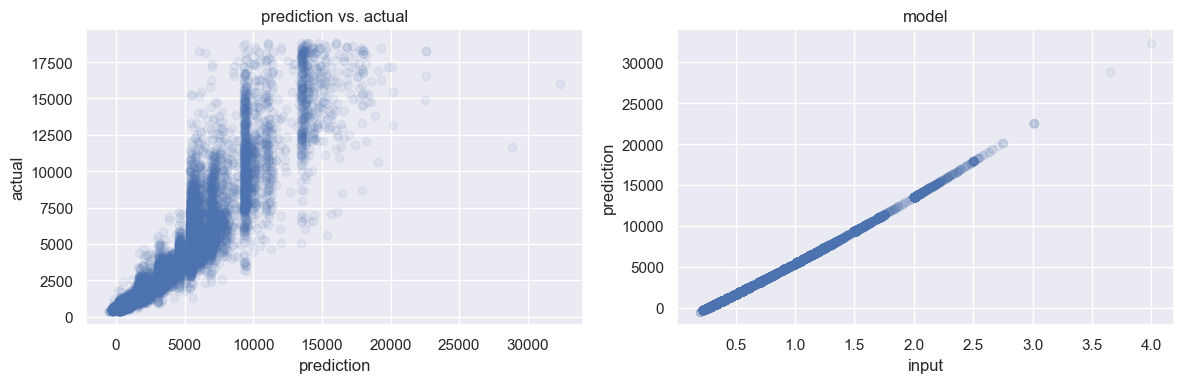

In [85]:
# show the result
f, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].scatter(pred, test_y, alpha = 0.08)
ax[0].set(title = 'prediction vs. actual', xlabel = 'prediction', ylabel = 'actual')
ax[1].scatter(test_X, pred, alpha = 0.08)
ax[1].set(title = 'model', xlabel = 'input', ylabel = 'prediction')
f.tight_layout()
plt.show()

In [86]:
print(
    f"MSE: {mean_squared_error(test_y,  pred)}\n"
    f"RMSE: {mean_squared_error(test_y, pred, squared = False)}\n"
    f"MAE: {mean_absolute_error(test_y, pred)}\n"
    f"R2_score: {r2_score(test_y, pred)}\n"
    f"adjusted R2 score: {adjusted_r2_score(test_y, pred)}"
)

MSE: 2281344.54707853
RMSE: 1510.4120454626047
MAE: 942.4868777936681
R2_score: 0.8551466424597569
adjusted R2 score: 0.8551358950671512
